In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs


In [2]:
# Cargamos el dataframe
df = pd.read_csv('data/train.csv',
        index_col='id',
#        dtype={'gimnasio': bool,
#                'usosmultiples': bool,
#                'escuelascercanas': bool,
#                'piscina': bool,
#                'centroscomercialescercanos': bool,
#                'tipodepropiedad': 'category',
#                'provincia': 'category',
#                'ciudad': 'category'
#            },
        parse_dates=['fecha'])

In [3]:
df

,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,2.00,...,"23,533.00",nan,nan,2015-08-23,0.00,0.00,0.00,0.00,0.00,"2,273,000.00"
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,2.00,...,"24,514.00",19.31,-99.23,2013-06-28,0.00,0.00,0.00,1.00,1.00,"3,600,000.00"
247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,2.00,...,"48,551.00",nan,nan,2015-10-17,0.00,0.00,0.00,0.00,0.00,"1,200,000.00"
209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,1.00,...,"53,666.00",19.30,-99.69,2012-03-09,0.00,0.00,0.00,1.00,1.00,"650,000.00"
185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,1.00,...,"47,835.00",nan,nan,2016-06-07,0.00,0.00,0.00,0.00,0.00,"1,150,000.00"
126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.00,2.00,1.00,1.00,...,"23,650.00",19.30,-99.15,2014-03-18,0.00,0.00,0.00,0.00,1.00,"1,100,000.00"
139233,de oportunidad casa en san lorenzo,"ubicada en esquina, pertenece san lorenzo agen...",Casa,NaN,Oaxaca de Juárez,Oaxaca,nan,3.00,1.00,2.00,...,"73,510.00",17.14,-96.80,2016-02-23,0.00,0.00,0.00,0.00,0.00,"1,150,000.00"
5013,casa emilia en venta en selvamar playa del carmen,casa emilia en venta playa del carmenfracciona...,Casa,condominio el trebol,Playa del Carmen,Quintana Roo,2.00,4.00,2.00,3.00,...,"130,510.00",20.67,-87.04,2016-10-20,0.00,0.00,0.00,0.00,0.00,"4,200,000.00"
44962,pre- venta preciosos depas 2 recamaras con sub...,<p>pre-venta de preciosos departamento ecologi...,Apartamento,BUENAVISTA DEPTOS CON SUBSIDIO,Villa de Alvarez,Colima,1.00,2.00,1.00,1.00,...,"9,010.00",nan,nan,2014-01-06,0.00,0.00,0.00,1.00,1.00,"310,000.00"


In [4]:
nulls = pd.DataFrame(df.isnull().sum().sort_values(), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
nulls

,nulls,porcentaje
precio,0,0.00
escuelascercanas,0,0.00
piscina,0,0.00
usosmultiples,0,0.00
gimnasio,0,0.00
fecha,0,0.00
centroscomercialescercanos,0,0.00
tipodepropiedad,46,0.02
provincia,155,0.06
ciudad,372,0.16


In [5]:
#Quiero descubrir las provincias y las ciudades donde no se lleno el tipo de propiedad
dfTPNull = df[df['tipodepropiedad'].isnull()].groupby(['provincia','ciudad']).size().reset_index()
dfTPNull.rename(columns={0:'cantidad'}, inplace=True)
dfTPNull = dfTPNull.sort_values(by = 'cantidad', ascending=False)
ciudades = list(dfTPNull.ciudad)
print(ciudades)
dfTPNull.head(10)

['San Luis Potosí', 'Huixquilucan', 'Boca del Río', 'Progreso', 'Tlalnepantla de Baz', 'Mérida']


,provincia,ciudad,cantidad
2,San luis Potosí,San Luis Potosí,20
0,Edo. de México,Huixquilucan,2
3,Veracruz,Boca del Río,2
5,Yucatán,Progreso,2
1,Edo. de México,Tlalnepantla de Baz,1
4,Yucatán,Mérida,1


Text(0, 0.5, 'Ciudad')

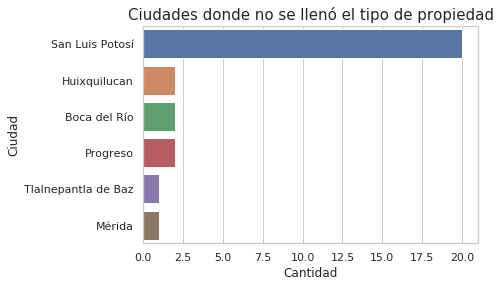

In [6]:
g = sns.barplot(x=dfTPNull['cantidad'], y=dfTPNull['ciudad'], orient='h')
g.set_title("Ciudades donde no se llenó el tipo de propiedad", fontsize=15)
g.set_xlabel("Cantidad", fontsize=12)
g.set_ylabel("Ciudad", fontsize=12)

#Mejorar grilla y valores para que den sin coma

Text(0, 0.5, 'Cantidad')

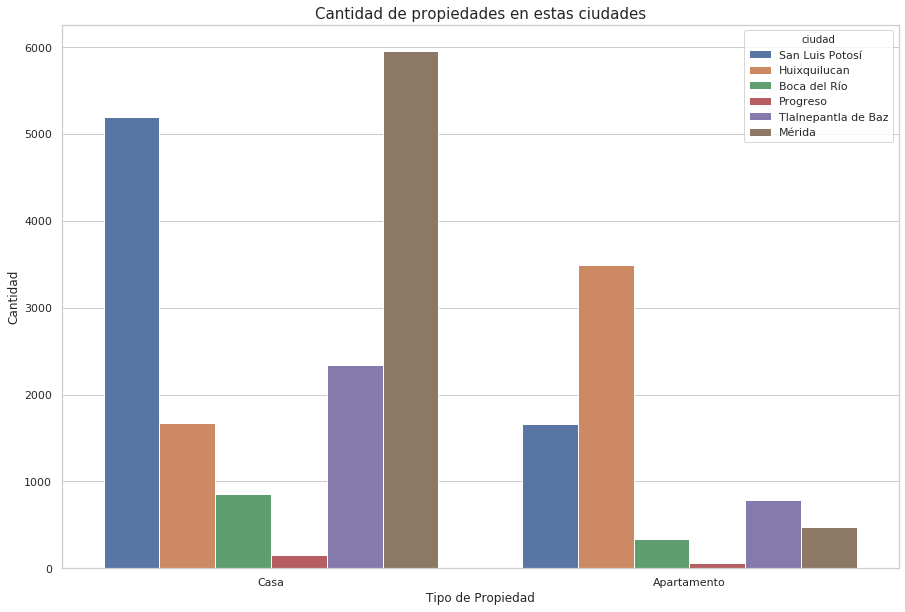

In [7]:
#Quiero ver cual es la propiedad con mayor cantidad que hay en cada una de estas ciudades.
df3 = df.loc[df['ciudad'].isin(ciudades),:]
df3 = df3.groupby(['ciudad','tipodepropiedad']).apply(lambda x: pd.Series(x.shape[0], index=["cantidad"]))
df3.reset_index(inplace=True)
newDf = pd.DataFrame(columns=df3.columns)
for i in ciudades: 
     newDf = newDf.append(df3[df3.ciudad == i].sort_values(by="cantidad", ascending=False)[0:2])

plt.figure(figsize=(15, 10))
g = sns.barplot(x=newDf['tipodepropiedad'], y=newDf['cantidad'], hue=newDf['ciudad'])
g.set_title("Cantidad de propiedades en estas ciudades", fontsize=15)
g.set_xlabel("Tipo de Propiedad", fontsize=12)
g.set_ylabel("Cantidad", fontsize=12)

In [8]:
#Quiero descubrir las provincias y las ciudades donde no se lleno el tipo de propiedad
dfTPNull = df[df['metroscubiertos'].isnull()].groupby(['provincia','ciudad']).size().reset_index()
dfTPNull.rename(columns={0:'cantidad'}, inplace=True)
dfTPNull = dfTPNull.sort_values(by = 'cantidad', ascending=False)
ciudades = list(dfTPNull.ciudad)

dfTPNull.head(10)

,provincia,ciudad,cantidad
325,San luis Potosí,San Luis Potosí,1246
311,Querétaro,Querétaro,1160
254,Nuevo León,Monterrey,904
200,Jalisco,Zapopan,735
103,Edo. de México,Naucalpan de Juárez,581
91,Edo. de México,Huixquilucan,562
410,Yucatán,Mérida,444
51,Distrito Federal,Benito Juárez,375
294,Puebla,San Andrés Cholula,369
61,Distrito Federal,Tlalpan,357
